# Librerias

In [108]:
import pandas as pd 
import matplotlib.pyplot as plt
import Algoritmosnumericos as Alg
import scipy.constants as c
plt.style.use('dark_background')
%matplotlib widget
%config InlineBackend.figure_format = 'retina'

# Datos

## Bobina

In [109]:
h=7e-2#Altura Bobina m
N_bobina=300# Número de aros de la bobina
datosbobina=pd.read_csv('datos campos bobinas.csv')
datosbobina=datosbobina.dropna()

In [110]:
datosbobina

,Datos 1:Tiempo(s),Datos 1:X campo magnetico(mT),Datos 1:Sensor de energia de voltaje(V),Datos 1:Sensor de energia de corriente(mA),Datos 1:Resistencia(Ω),Datos 1:Potencia(mW),Datos 1:Energia(J),ajuste 2:Tiempo(s),ajuste 2:X campo magnetico(mT),ajuste 2:Sensor de energia de voltaje(V),...,ajuste 7:Resistencia(Ω),ajuste 7:Potencia(mW),ajuste 7:Energia(J),ajuste 8:Tiempo(s),ajuste 8:X campo magnetico(mT),ajuste 8:Sensor de energia de voltaje(V),ajuste 8:Sensor de energia de corriente(mA),ajuste 8:Resistencia(Ω),ajuste 8:Potencia(mW),ajuste 8:Energia(J)
0,0.00,0.02,10.08,-5.3,-1900.0,-53.5,0.00,0.00,3.08,11.10,...,-11.9,-9635.5,0.00,0.00,0.02,9.73,-3.7,-2602.1,-36.3,0.00
1,0.05,0.02,10.05,-5.8,-1726.8,-58.5,-0.00,0.05,3.08,11.15,...,-11.9,-9696.4,-0.48,0.05,0.02,9.73,-3.2,-3045.6,-31.1,-0.00
2,0.10,0.02,10.06,-5.8,-1729.7,-58.6,-0.01,0.10,3.08,10.91,...,-11.9,-9660.0,-0.97,0.10,0.01,9.67,-3.2,-3029.7,-30.9,-0.00
3,0.15,0.02,10.10,-5.3,-1903.1,-53.6,-0.01,0.15,3.08,11.10,...,-11.9,-9690.8,-1.45,0.15,0.02,9.74,-3.2,-3050.9,-31.1,-0.00
4,0.20,0.02,10.05,-5.3,-1893.5,-53.3,-0.01,0.20,3.08,11.05,...,-11.8,-9619.6,-1.93,0.20,0.02,9.67,-3.7,-2588.5,-36.2,-0.01
5,0.25,0.02,10.06,-5.3,-1896.7,-53.4,-0.01,0.25,3.08,10.98,...,-12.5,-9171.7,-2.40,0.25,0.02,9.69,-3.2,-3034.9,-30.9,-0.01
6,0.30,0.02,10.00,-5.3,-1883.9,-53.0,-0.02,0.30,3.08,11.08,...,-14.2,-7699.4,-2.83,0.30,0.02,9.66,-3.2,-3024.2,-30.8,-0.01
7,0.35,0.02,10.00,-5.3,-1883.9,-53.0,-0.02,0.35,3.08,11.10,...,-17.8,-6019.4,-3.17,0.35,0.02,9.69,-3.2,-3034.9,-30.9,-0.01
8,0.40,0.02,9.98,-5.3,-1880.8,-53.0,-0.02,0.40,3.08,11.17,...,-29.6,-3440.7,-3.40,0.40,0.02,9.78,-3.2,-3061.6,-31.2,-0.01
9,0.45,0.02,10.00,-5.8,-1718.1,-58.2,-0.02,0.45,3.08,11.10,...,-65.6,-1440.9,-3.53,0.45,0.02,9.74,-3.2,-3050.9,-31.1,-0.01


## Brujúla 

In [111]:
datosbrujula=pd.read_csv('datos aro.txt')

In [112]:
datosbrujula

,φ(°),I(mA),Bs(mT),tan(φ)
0,10,-37.896677,-0.001361,0.176327
1,20,-209.845331,-0.007534,0.363970
2,30,-211.253958,-0.007585,0.577350
3,40,-436.314289,-0.015665,0.839100
4,50,-554.799108,-0.019920,1.191754
5,60,-767.181787,-0.027545,1.732051


# Ecuaciones

## Bobina

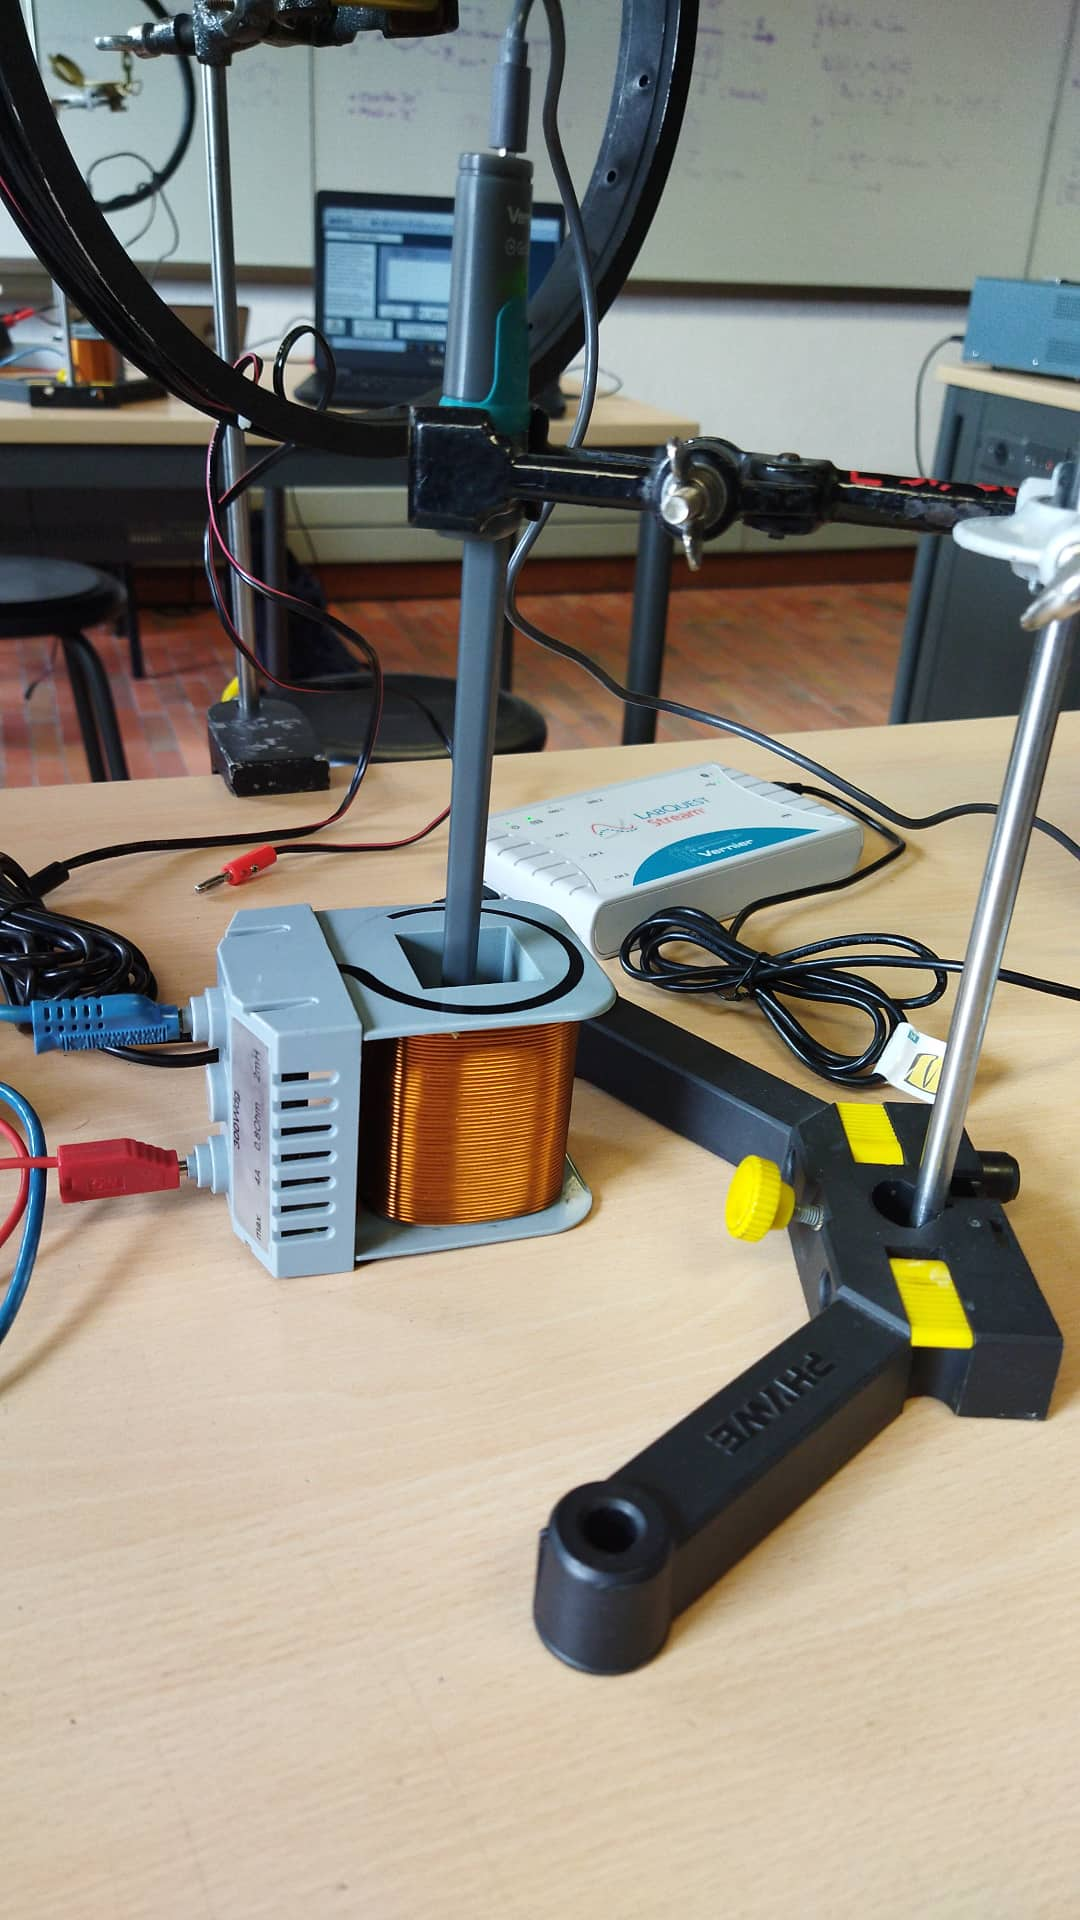

Como podemos ver la corriente va por la bobina y además, por la ley de Ampere $\oint \bar{B_{dl}} \cdot \bar{dl} = \mu_{0} I_{encerrada}$. El lado izquierdo de la ecuación podemos calcularla facilmente, ya que el campo $\bar{B_{s}}$ es uniforme y vertical y la integral de camino se reduce a $B_{S}*h$
así tenemos:

$$B_{s}(I)=\frac{\mu_{0}{N}I}{h}$$

Haciendo regresión lineal nos queda

$$m=\frac{\mu_{0} N}{L} \longleftrightarrow \mu_{0}=\frac{mh}{N} $$



## Brújula 

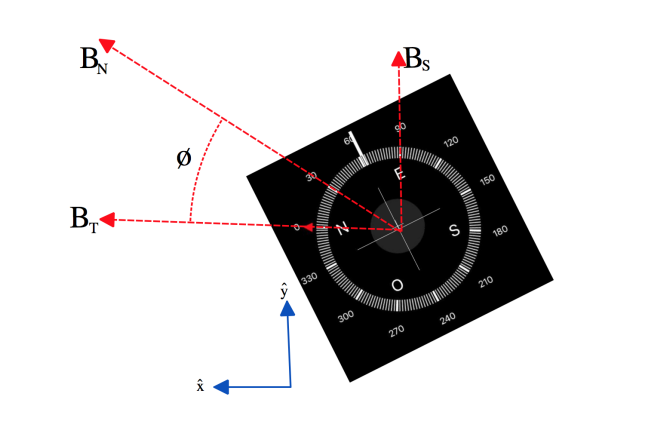

Tenemos las siguientes ecuaciones:

$$B_{S}=B_{N}sin\phi$$

$$B_{T}=B_{N}cos \phi $$

Lo anterior es equivalente a:

$$B_{S}=B_{T}tan \phi$$

# Análisis Cuantitativo

## Permitividad del vacío a través de la bobina

La permisividad del vacío experimental es: 7e-07 N/A^2
La permisividad del vacío teórica es: 1.25663706212e-06 N/A^2


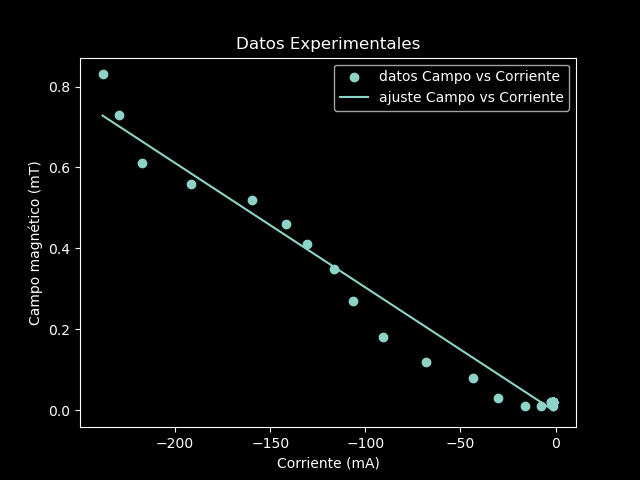

In [113]:
fig, ax = plt.subplots()
Alg.dibujo_reglineal(datosbobina['ajuste 4:Sensor de energia de corriente(mA)'].tolist(), datosbobina['ajuste 4:X campo magnetico(mT)'].tolist(
), 0, 0, 'Datos Experimentales', 'Corriente (mA)', 'Campo magnético (mT)', ax, 'Campo vs Corriente')
ajuste=Alg.regresionlineal(datosbobina['ajuste 4:Sensor de energia de corriente(mA)'].tolist(), datosbobina['ajuste 4:X campo magnetico(mT)'].tolist())
m=ajuste[0][0]
μ_0_exp=_exp=round(abs((m*h)/N_bobina)/1e-7)*1e-7
μ_0=c.mu_0
print(f'La permisividad del vacío experimental es: {μ_0_exp} N/A^2')
print(f'La permisividad del vacío teórica es: {μ_0} N/A^2')



## Campo magnético de la tierra a través de la brújula

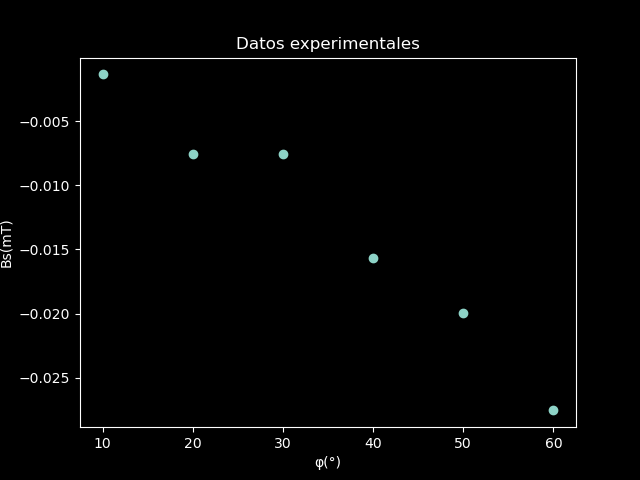

In [114]:
fig,ax=plt.subplots()
ax.scatter(datosbrujula['φ(°)'].tolist(),datosbrujula['Bs(mT)'].tolist())
ax.set_xlabel('φ(°)')
ax.set_ylabel('Bs(mT)')
ax.set_title('Datos experimentales')
plt.show()

El campo magnético de la tierra experimental es: 2e-05 T
El campo magnético de la tierra teórica es: 2.7e-05 T


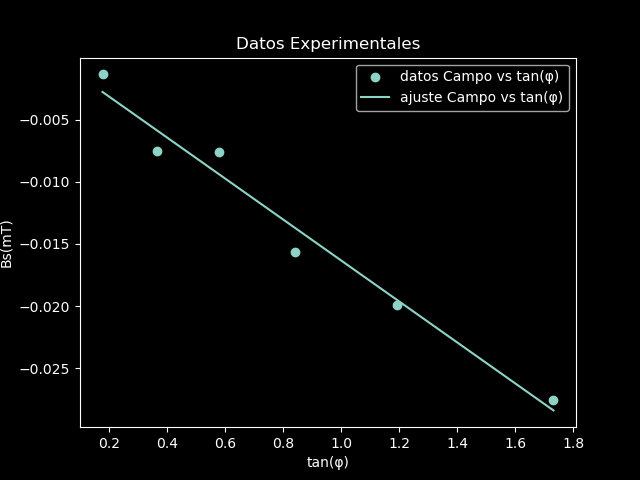

In [118]:
fig, ax = plt.subplots()
Alg.dibujo_reglineal(datosbrujula['tan(φ)'].tolist(), datosbrujula['Bs(mT)'].tolist(
), 0, 0, 'Datos Experimentales', 'tan(φ)', 'Bs(mT)', ax, 'Campo vs tan(φ)')
ajuste=Alg.regresionlineal(datosbrujula['tan(φ)'].tolist(), datosbrujula['Bs(mT)'].tolist())
BT_exp=round(abs(ajuste[0][0]*1e-3/1e-5))*1e-5
BT=27e-6
print(f'El campo magnético de la tierra experimental es: {BT_exp} T')
print(f'El campo magnético de la tierra teórica es: {BT} T')



# Análisis cualitativo

**Si se desea construir un dispositivo que cancele el campo magnético externo usando solenoides, ¿cuántos solenoides son necesarios para cancelar el campo magnético externo? ¿Qué aplicaciones tiene el poder cancelar el campo magnético externo?**

R/ El campo magnético producido por un solenoide se genera únicamente en el medio de este. Así, la mejor forma de cancelar el campo magnético (saliente) de la cara de un objeto es poner un solenoide en la cara de tal forma que el campo del solenoide compare la magnitud del campo del objeto, pero en dirección opuesta, de tal modo que los campos se cancelen.




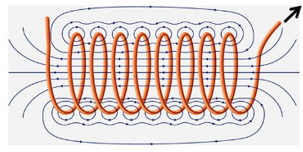

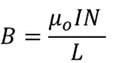

Alguna aplicación que se le puede dar a la cancelación de campos magnéticos es el de inhabilitar una fuerza magnética. Si la fuerza magnética total es 0, la ley de Faraday nos dice que no existe una corriente inducida y por tanto no hay una alteración las componentes electrónicas del circuito del dispositivo. 

**¿Cómo es el comportamiento de la brújula al aumentar la corriente en el alambre? Explique.**

R/ La principio, cuando la corriente es 0, el campo magnético detectado por la brújula es el de la tierra. Cuando se empieza a pasar corriente, se comienza a detectar otra componente vectorial que es la del campo producida por el aro. Así lo que detecta la brújula es el campo magnético total producido por la suma vectorial del campo magnético de la tierra y el campo magnético del aro. Debido a que estas componentes son octogonales y que a medida que se incrementa la corriente se incremente al campo del aro, cuando se aumenta la corriente se va a evidenciar un cambio en el ángulo del vector resultante, de tal modo que cuando la corriente tiene al infinito, la componente estará alineada totalmente con el campo magnético generado por el aro.

**En el procedimiento experimental se pide ubicar la brújula en el centro del aro, ¿por qué es esto conveniente?**

R/ Esto conveniente ya que en el cetro del aro el campo magnético es máximo debido a que el campo magnético del aro decrece con el radio. De este modo y como lo dicta el algebra lineal la línea recta que sería la distancia del centro al radio es la distancia más corta y por ende el lugar en el espacio donde el campo magnético del aro es mayor.

**¿Qué efecto tendría aumentar el número de vueltas del aro? ¿Cómo cambiaría la gráfica Bs vs. I?**

R/ La relación entre el campo, la corriente y el número N de vueltas es lineal. De una forma aproximada sería de la forma Bs=NI. Así, entre mayor sea el número de vueltas N, mayor será el campo magnético en comparación a la corriente, pues la pendiente es mucho mayor. De este modo, lo único que cambia en la gráfica de B vs I es la pendiente, la cual en el caso de aumentar el valor de N será mucho mas empinada.

**¿Qué efecto tendría intercambiar los cables conectados a la fuente en el campo magnético producido por el solenoide?**

R/ Cambiar los cables implica cambiar la dirección de la corriente, por lo que la dirección del campo magnético se debería de invertir.

**¿Qué efecto tendría en el experimento que el campo del aro no se genere de forma perpendicular al campo magnético terrestre?**

R/ En este caso la forma de hallar la relación del campo de la tierra y del aro sería mucho más difícil, pues no respetaría la proporción lineal con la tangente del ángulo entre ellos. No obstante, el razonamiento sigue siendo el mismo, pues la brújula apuntará hacia el vector resultante total, es cual es la suma vectorial de dichos campos magnéticos.


# Conclusión

- En este laboratorio se comprobó experimentalmente la superposición de campos magnéticos a la hora de experimentar un cambio en la dirección que marca la brújula.
- Se comprobó experimentalmente el valor de la permeabilidad magnética del aire, la cual se razona que es comparable con la del vacío. 
- Se determinó, mediante la relación del campo magnético del aro y la corriente que pasó alrededor de este, la magnitud del campo magnético de la tierra.

